# Naive Bayes

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [2]:
data = pd.read_csv('../Datasets/Social_Network_Ads.csv')
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

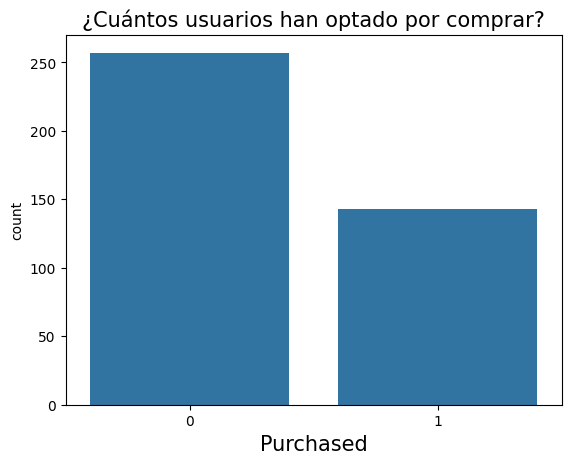

In [4]:
sns.countplot(data = data, x = 'Purchased')
plt.xlabel('Purchased', fontsize = 15)
plt.title('¿Cuántos usuarios han optado por comprar?', fontsize = 15)
plt.show()

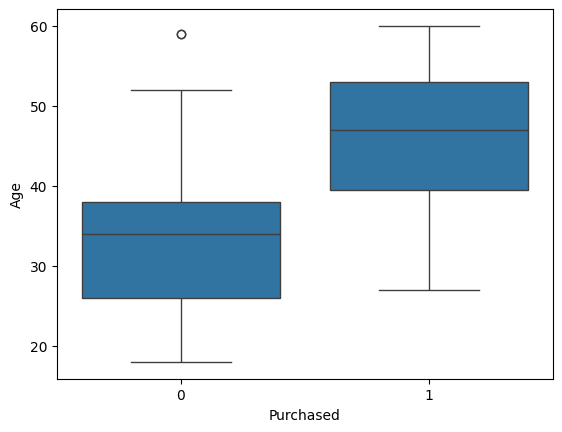

In [5]:
sns.boxplot(x='Purchased',y='Age',data=data)
plt.show()

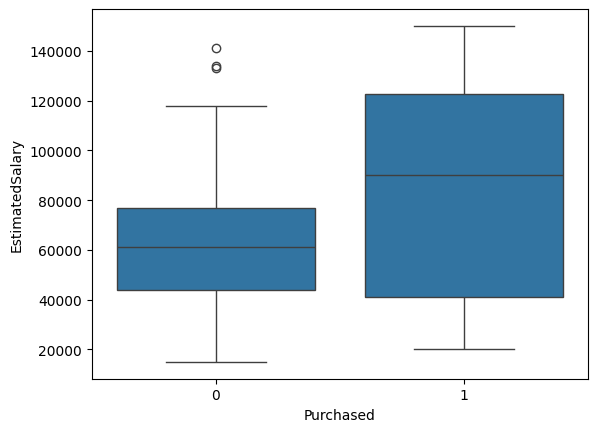

In [6]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=data)
plt.show()

Gender     Female  Male
Purchased              
0             127   130
1              77    66


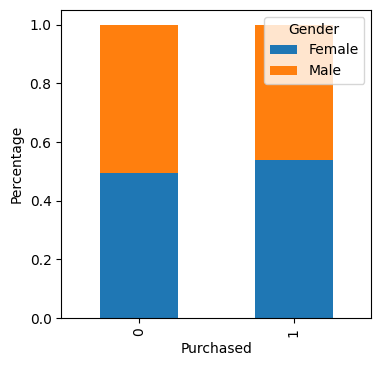

In [7]:
print(pd.crosstab(data["Purchased"],data["Gender"]))
Gender = pd.crosstab(data["Purchased"],data["Gender"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Purchased")
plt.ylabel("Percentage")
plt.show()

In [8]:
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, -1].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [16]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [24]:
classifier = GaussianNB().fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Confusion matrix, without normalization
[[55  3]
 [ 4 18]]
Normalized confusion matrix
[[0.94827586 0.05172414]
 [0.18181818 0.81818182]]


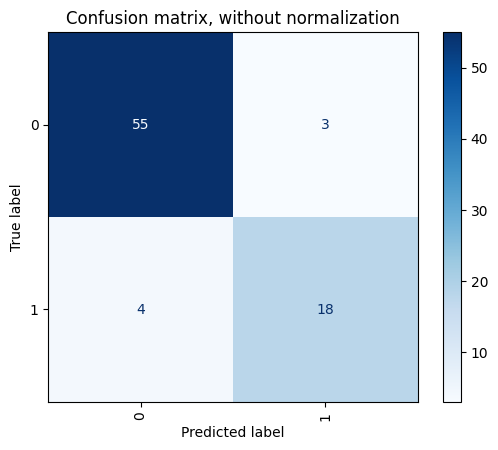

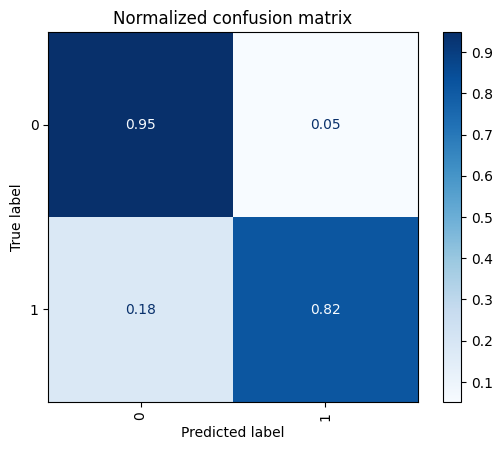

In [18]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
cm = confusion_matrix(y_test, y_pred)
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    if normalize:
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=classifier.classes_)
        disp = disp.plot(cmap=plt.cm.Blues, values_format='.2f', xticks_rotation='vertical')
    else:
        disp = disp.plot(cmap=plt.cm.Blues, values_format='d', xticks_rotation='vertical')

    disp.ax_.set_title(title)

    print(title)
    print(cm if not normalize else cm_normalized)

plt.show()


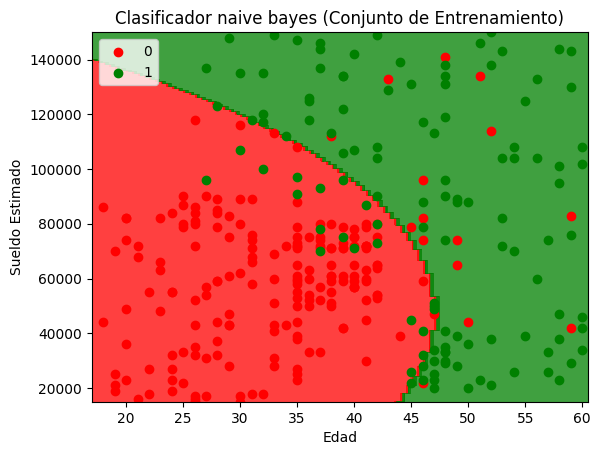

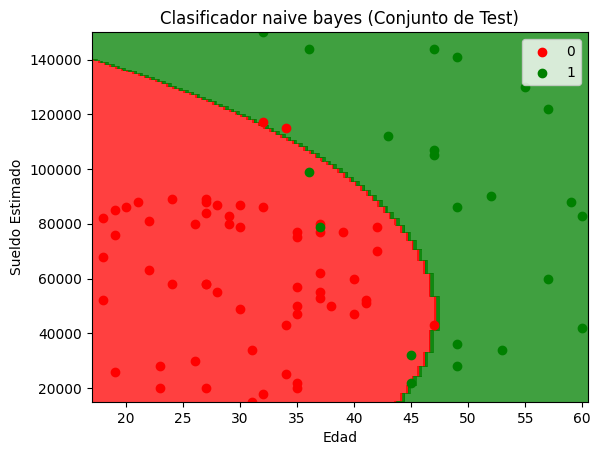

In [30]:
def plot_classifier(classifier, X_set, y_set, xlabel, ylabel, title):
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.5))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ['red', 'green'][i], label = j)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

plot_classifier(classifier, X_train, y_train, 'Edad', 'Sueldo Estimado', 'Clasificador naive bayes (Conjunto de Entrenamiento)')
plot_classifier(classifier, X_test, y_test, 'Edad', 'Sueldo Estimado', 'Clasificador naive bayes (Conjunto de Test)')

In [20]:
y_pred_prob = classifier.predict_proba(X_test)
y_pred_prob[0:5]

array([[0.89400067, 0.10599933],
       [0.84165896, 0.15834104],
       [0.85348304, 0.14651696],
       [0.92105103, 0.07894897],
       [0.89959751, 0.10040249]])

In [21]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9843260188087775

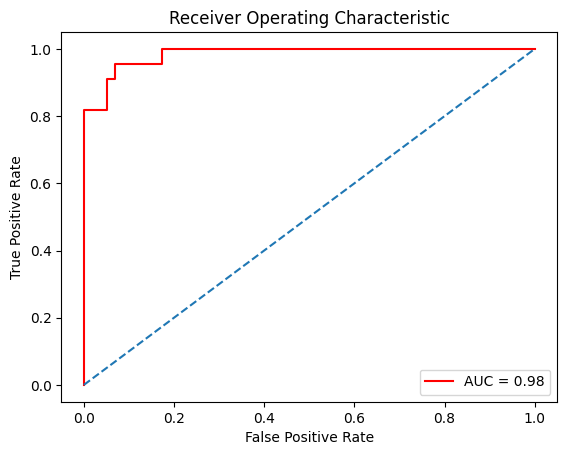

In [22]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
dataf_combined = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)
dataf_combined.columns = ['Age', 'EstimatedSalary', 'Purchased', 'Purchased_Pred', 'Purchased_Pred_Prob_0', 'Purchased_Pred_Prob_1']
dataf_combined.head(10)

,Age,EstimatedSalary,Purchased,Purchased_Pred,Purchased_Pred_Prob_0,Purchased_Pred_Prob_1
0,30,87000,0,0,0.891470,0.108530
1,38,50000,0,0,0.840978,0.159022
2,35,75000,0,0,0.851773,0.148227
3,30,79000,0,0,0.919108,0.080892
4,35,50000,0,0,0.898362,0.101638
5,27,20000,0,0,0.954340,0.045660
6,31,15000,0,0,0.904144,0.095856
7,36,144000,1,1,0.035569,0.964431
8,18,68000,0,0,0.989188,0.010812
9,47,43000,0,0,0.502816,0.497184


In [27]:
def asignar_categoria(valor):
    if valor <= 0.2:
        return 'MB'  # Muy bajo
    elif valor <= 0.4:
        return 'B'   # Bajo
    elif valor <= 0.6:
        return 'M'   # Medio
    elif valor <= 0.8:
        return 'A'   # Alto
    else:
        return 'MA'  # Muy alto

dataf_combined['Score'] = dataf_combined['Purchased_Pred_Prob_1'].apply(asignar_categoria)
dataf_combined

,Age,EstimatedSalary,Purchased,Purchased_Pred,Purchased_Pred_Prob_0,Purchased_Pred_Prob_1,Score
0,30,87000,0,0,0.891470,0.108530,MB
1,38,50000,0,0,0.840978,0.159022,MB
2,35,75000,0,0,0.851773,0.148227,MB
3,30,79000,0,0,0.919108,0.080892,MB
4,35,50000,0,0,0.898362,0.101638,MB
...,...,...,...,...,...,...,...
75,18,82000,0,0,0.983307,0.016693,MB
76,42,79000,0,0,0.595706,0.404294,M
77,40,60000,0,0,0.773184,0.226816,B
78,53,34000,1,1,0.219853,0.780147,A
